In [ ]:
import sys
import requests
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd

In this homework, I will complete two tasks: working with a REST API and web scraping.

For the REST API part, I will fetch data in JSON format from the Nobel Prize API, specifically focusing on the Physics category. I will extract all prize motivations, clean the text by removing stop words and unnecessary spaces, and visualize the word frequencies using a word cloud.

In the web scraping part, I will scrape book data from Books to Scrape. I will collect information such as UPC, title, price, and rating for the books on the first three pages (60 books in total) and organize the data into a table.


Here is the word cloud:


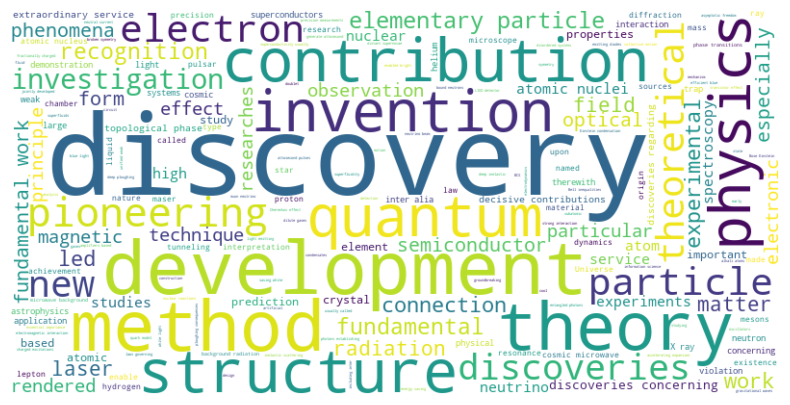

In [13]:
# Fetch data from the Nobel Prize API
response = requests.get('http://api.nobelprize.org/2.1/laureates?limit=300&nobelPrizeYear=1901&yearTo=2024&nobelPrizeCategory=phy')
data = response.json()

# Collect motivations
motivations = []
for laureate in data.get('laureates', []):
    for prize in laureate.get('nobelPrizes', []):
        motivation = prize.get('motivation', {}).get('en', '')
        if motivation:
            motivations.append(motivation)

# Combine motivations into a single string
text = ' '.join(motivations)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(WordCloud().stopwords)).generate(text)

print("Here is the word cloud:")

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [14]:
# Base URL
base_url = "https://books.toscrape.com/catalogue/page-{}.html"

# Function to fetch book details
def fetch_book_details(book_url):
    response = requests.get(book_url)
    if response.status_code != 200:
        print(f"Failed to fetch {book_url}")
        return "Not Found"
    
    soup = BeautifulSoup(response.text, 'html.parser')
    upc_tag = soup.find('th', text="UPC")
    if upc_tag:
        upc = upc_tag.find_next_sibling('td').text
    else:
        upc = "Not Found"
    return upc

# Function to scrape a single page
def scrape_page(page_number):
    url = base_url.format(page_number)
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to fetch page {page_number}")
        return []
    
    soup = BeautifulSoup(response.text, 'html.parser')
    books = soup.find_all('article', class_='product_pod')
    
    data = []
    for book in books:
        title = book.h3.a['title']
        price = book.find('p', class_='price_color').text
        rating = book.p['class'][1]
        book_url = "https://books.toscrape.com/catalogue/" + book.h3.a['href'].lstrip('./')
        upc = fetch_book_details(book_url)
        data.append([upc, title, price, rating])
    return data

# Scrape all pages (1-3)
all_data = []
for page in range(1, 4):
    print(f"Scraping page {page}...")
    all_data.extend(scrape_page(page))

# Create DataFrame and save as CSV
columns = ['upc', 'title', 'price', 'rating']
df = pd.DataFrame(all_data, columns=columns)
df.to_csv('books_scraped.csv', index=False)
print("Here are the results:")
# Display DataFrame
print(df)


Scraping page 1...
Scraping page 2...
Scraping page 3...
Here are the results:
                 upc                                              title  \
0   a897fe39b1053632                               A Light in the Attic   
1   90fa61229261140a                                 Tipping the Velvet   
2   6957f44c3847a760                                         Soumission   
3   e00eb4fd7b871a48                                      Sharp Objects   
4   4165285e1663650f              Sapiens: A Brief History of Humankind   
5   f77dbf2323deb740                                    The Requiem Red   
6   2597b5a345f45e1b  The Dirty Little Secrets of Getting Your Dream...   
7   e72a5dfc7e9267b2  The Coming Woman: A Novel Based on the Life of...   
8   e10e1e165dc8be4a  The Boys in the Boat: Nine Americans and Their...   
9   1dfe412b8ac00530                                    The Black Maria   
10  0312262ecafa5a40     Starving Hearts (Triangular Trade Trilogy, #1)   
11  30a7f60cd76ca58c 